In [19]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [20]:
dir = 'C:\\Users\\Mohamed\\PycharmProjects\\pythonProject1\\Graduation\\CelebA_Spoof\\Data\\train'

categories = ['live','spoof']

data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        spoof_image = cv2.imread(imgpath,0)
        spoof_image = cv2.resize(spoof_image,(50,50))
        image = np.array(spoof_image).flatten()
        
        data.append([image,label])
        
pick_in = open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [21]:
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [22]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.30)
model = SVC(C=1,kernel='poly', gamma='auto')
model.fit(xtrain,ytrain)

svm_model=open('svm_model.sav','wb')
pickle.dump(model,svm_model)
svm_model.close()

Accuracy:  0.89
Prediction is:  spoof


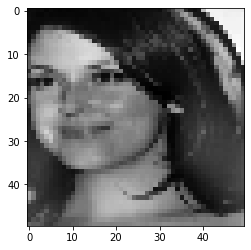

In [23]:
svm_read=open('svm_model.sav','rb')
model=pickle.load(svm_read)
svm_read.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)

categories = ['live','spoof']

print('Accuracy: ',accuracy)
print('Prediction is: ',categories[prediction[0]])

my_classify=xtest[0].reshape(50,50)
plt.imshow(my_classify,cmap='gray')
plt.show()

In [30]:
from sklearn import svm
clf = svm.SVC(kernel='poly') # Linear Kernel
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))

Accuracy: 0.8883333333333333
Precision: 0.8625730994152047
Recall: 0.9365079365079365
